In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import multivariate_normal
from utils import utils

seed = 42

# Define sample sizes and number of runs
sample_sizes = [50, 100, 150, 200, 250, 300]
num_outer_runs = 25 # Number of times to repeat the experiment for each sample size
significance_level = 0.05

/Users/anirbanc/Documents/GitHub/mMMD/Experiments/power/utils/betMMD_utils.py:182: SyntaxWarning: invalid escape sequence '\l'
  K_{t} = K_{t-1} \times (1 + \lambda_t F_t),


In [2]:
d = 2
x_mean = np.zeros(d); y_mean = 0.25*np.ones(d)
x_cov = y_cov = np.eye(d)

X_distribution = multivariate_normal(x_mean, x_cov)
Y_distribution = multivariate_normal(y_mean, y_cov)

In [3]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, seed = seed
)

Sample size 300: 100%|██████████| 25/25 [01:14<00:00,  2.97s/it]


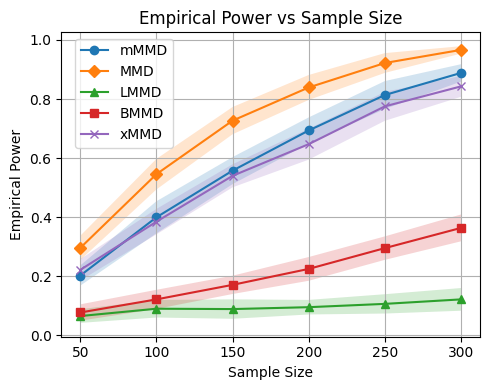

In [ ]:
test_names = [k for k in power_results]
markers = ['o', 'D', '^', 's', 'x']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc = "center", bbox_to_anchor = (0.15,0.8))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_power_vs_sample_size_gaussian_mean_d_2.pdf", dpi=1200)
plt.show()


In [5]:
from scipy.stats import multivariate_normal
import numpy as np

# Parameters
d = 10           # Dimension
j = 5           # Number of coordinates to shift
epsilon = 0.3  # Mean shift in first j coordinates

# Mean vectors
x_mean = np.zeros(d)
y_mean = np.zeros(d)
y_mean[:j] = epsilon  # Apply shift to first j coordinates

# Covariance matrices
x_cov = y_cov = np.eye(d)

# Define distributions
X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

betting_args = {'d':d, 'j':j, 'epsilon':epsilon}


In [6]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, betting_args = betting_args, seed = seed
)

Sample size 100: 100%|██████████| 25/25 [00:08<00:00,  2.80it/s]
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:295: RuntimeWarning: divide by zero encountered in scalar divide
  F[i] =F_[i] / max_val
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:192: RuntimeWarning: invalid value encountered in scalar divide
  z = -F[i] / (1 + Lambda[i]*F[i])
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:295: RuntimeWarning: divide by zero encountered in scalar divide
  F[i] =F_[i] / max_val
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:192: RuntimeWarning: invalid value encountered in scalar divide
  z = -F[i] / (1 + Lambda[i]*F[i])
Sample size 150:   0%|          | 0/25 [00:00<?, ?it/s]/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:295:

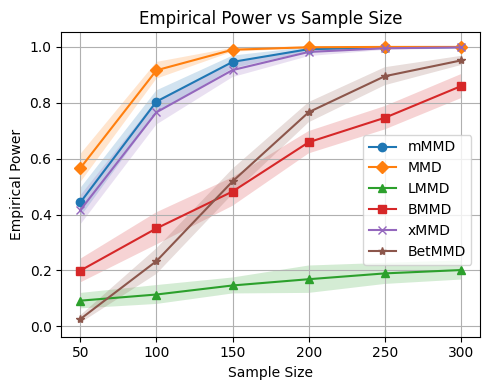

In [ ]:
test_names = [k for k in power_results]
markers = ['o', 'D', '^', 's', 'x' ,'*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD',
    'BetMMD': 'BetMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc = "center", bbox_to_anchor = (0.85,0.45))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_power_vs_sample_size_gaussian_mean_d_10_eps_3.pdf", dpi=1200)
plt.show()


In [8]:
from scipy.stats import multivariate_normal
import numpy as np

# Parameters
d = 50           # Dimension
j = 5           # Number of coordinates to shift
epsilon = 0.4  # Mean shift in first j coordinates

# Mean vectors
x_mean = np.zeros(d)
y_mean = np.zeros(d)
y_mean[:j] = epsilon  # Apply shift to first j coordinates

# Covariance matrices
x_cov = y_cov = np.eye(d)

# Define distributions
X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

betting_args = {'d':d, 'j':j, 'epsilon':epsilon}


In [9]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, betting_args = betting_args, seed = seed
)

Sample size 300: 100%|██████████| 25/25 [01:35<00:00,  3.83s/it]


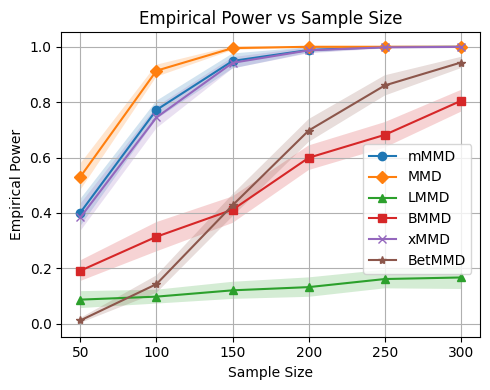

In [ ]:
test_names = [k for k in power_results]
markers = ['o', 'D', '^', 's', 'x', '*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc = "center", bbox_to_anchor = (0.85,0.42))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_power_vs_sample_size_gaussian_mean_d_50_eps_4.pdf", dpi=1200)
plt.show()


In [16]:
from scipy.stats import multivariate_normal
import numpy as np

# Parameters
d = 100           # Dimension
j = 5           # Number of coordinates to shift
epsilon = 0.5  # Mean shift in first j coordinates

# Mean vectors
x_mean = np.zeros(d)
y_mean = np.zeros(d)
y_mean[:j] = epsilon  # Apply shift to first j coordinates

# Covariance matrices
x_cov = y_cov = np.eye(d)

# Define distributions
X_distribution = multivariate_normal(mean=x_mean, cov=x_cov)
Y_distribution = multivariate_normal(mean=y_mean, cov=y_cov)

betting_args = {'d':d, 'j':j, 'epsilon':epsilon}


In [17]:
# Compute empirical power over sample sizes
power_results = compute_power_over_sample_sizes(
    X_distribution, Y_distribution, sample_sizes, num_outer_runs, significance_level, Kernel = RBF_Kernel, betting_args = betting_args, seed = seed
)

Sample size 100: 100%|██████████| 25/25 [00:18<00:00,  1.34it/s]
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:295: RuntimeWarning: divide by zero encountered in scalar divide
  F[i] =F_[i] / max_val
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:192: RuntimeWarning: invalid value encountered in scalar divide
  z = -F[i] / (1 + Lambda[i]*F[i])
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:295: RuntimeWarning: divide by zero encountered in scalar divide
  F[i] =F_[i] / max_val
/Users/aditya/Documents/GitHub/AR-Projects/Experiments/mMMD/mMMD_power_over_samples/betMMD_utils.py:192: RuntimeWarning: invalid value encountered in scalar divide
  z = -F[i] / (1 + Lambda[i]*F[i])
Sample size 300: 100%|██████████| 25/25 [02:06<00:00,  5.07s/it]


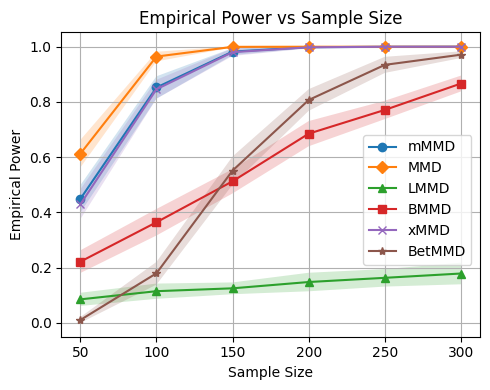

In [ ]:
test_names = [k for k in power_results]
markers = ['o', 'D', '^', 's', 'x', '*']

custom_labels = {
    'mmd': 'MMD',
    'mMMD': 'mMMD',
    'LMMD': 'LMMD',
    'BTest': 'BMMD',
    'CrossMMD': 'xMMD'
}

plt.figure(figsize=(5, 4))

for i, test_name in enumerate(test_names):
    results = power_results[test_name]
    means = np.array(results['mean'])
    stds = np.array(results['std'])
    lower = means - stds
    upper = means + stds

    plt.plot(sample_sizes, means, 
             label=custom_labels.get(test_name, test_name),
             marker=markers[i % len(markers)])
    plt.fill_between(sample_sizes, lower, upper, alpha=0.2)

plt.xlabel("Sample Size")
plt.ylabel("Empirical Power")
plt.title("Empirical Power vs Sample Size")
plt.legend(loc = "center", bbox_to_anchor = (0.85,0.45))
plt.grid(True)

plt.tight_layout()
plt.savefig("results/empirical_power_vs_sample_size_gaussian_mean_d_100_eps_5.pdf", dpi=1200)
plt.show()
